# `ALY6010: Probability Theory and Introductory Statistics`
#### Prepared by:
####            KrishnaPrasad Marisamy (NEU- 002620220)
####            Manjyot Kaur Gill (NEU-002662913)
####            Rishikesh balaji Muthukumar (NEU-002635243)
####            Rohana Survase (NEU-002619051)
#### Presented to: Dr. Chinthaka Pathum Dinesh Herath Gedara
#### Date: March 26,2023

### Objective
##### The "Age" and "Balance" variables in the bank churn dataset will be subject to one-sample and two-sample t-tests in this analysis. The goal is to determine what causes customers to leave and provide knowledge and advice for the bank's customer retention strategy.

### Variables Description:
##### RowNumber: A unique identifier for each record in the dataset.
##### CustomerId: A unique identifier for each customer in the bank.
##### Surname: The last name of the customer.
##### CreditScore: a number that represents a customer's creditworthiness or credit eligibility.
##### Geography: The dataset has three alternative values for the customer's country of residence(Spain, Germany and France)
##### Gender: the customer's gender, which may be either male or female.
##### Age: The age of the customer in years.
##### Tenure: The number of years that the customer has been a client of the bank.
##### Balance: The total amount of money that a client has in their bank account.
##### NumOfProducts: The amount of products a customer utilises or has with the bank.
##### HasCrCard: the presence or absence of the customer's credit card with the bank; a value of 1 denotes the presence of a credit card.
##### IsActiveMember: If the client is a current, active member of the bank.
##### EstimatedSalary: The estimated yearly salary of the customer.
##### Exited: A binary variable with a value of 1 indicating that the customer has churned or left the bank, and a value of 0 indicating that they have not churned.

### Importing required packages

In [ ]:
install.packages("gplots")
install.packages("dplyr")

library(gplots)

install.packages("moments")
library(moments)

library(dplyr)
library(ggplot2)
library(tidyr)


  There is a binary version available but the source version is later:
       binary source needs_compilation
gplots  3.1.1  3.1.3             FALSE



installing the source package 'gplots'

also installing the dependencies 'cli', 'lifecycle', 'pillar', 'rlang', 'tibble', 'tidyselect', 'vctrs'




  There are binary versions available but the source versions are later:
           binary source needs_compilation
cli         2.5.0  3.6.1              TRUE
lifecycle   1.0.0  1.0.3             FALSE
pillar      1.6.0  1.9.0             FALSE
rlang      0.4.11  1.1.0              TRUE
tibble      3.1.1  3.2.1              TRUE
tidyselect  1.1.1  1.2.0             FALSE
vctrs       0.3.8  0.6.1              TRUE
dplyr       1.0.6  1.1.1              TRUE

  Binaries will be installed
package 'cli' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'tibble' successfully unpacked and MD5 sums checked
package 'vctrs' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\krish\AppData\Local\Temp\Rtmp0YNhdj\downloaded_packages


installing the source packages 'lifecycle', 'pillar', 'tidyselect'

Warning message in install.packages("dplyr"):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("dplyr"):
"installation of package 'pillar' had non-zero exit status"Warning message in install.packages("dplyr"):
"installation of package 'tidyselect' had non-zero exit status"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess




  There is a binary version available but the source version is later:
        binary source needs_compilation
moments   0.14 0.14.1             FALSE



installing the source package 'moments'

Warning message:
"package 'dplyr' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'dplyr' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'lifecycle'


### Reading the dataset

In [ ]:
bank_churn <- read.csv("Churn Modeling.csv", header = TRUE, sep = ",")

### Descriptive Statistics

In [ ]:
summary(bank_churn)

   RowNumber       CustomerId           Surname      CreditScore   
 Min.   :    1   Min.   :15565701   Smith   :  32   Min.   :350.0  
 1st Qu.: 2501   1st Qu.:15628528   Martin  :  29   1st Qu.:584.0  
 Median : 5000   Median :15690738   Scott   :  29   Median :652.0  
 Mean   : 5000   Mean   :15690941   Walker  :  28   Mean   :650.5  
 3rd Qu.: 7500   3rd Qu.:15753234   Brown   :  26   3rd Qu.:718.0  
 Max.   :10000   Max.   :15815690   Genovese:  25   Max.   :850.0  
                                    (Other) :9831                  
   Geography       Gender          Age            Tenure          Balance      
 France :5014   Female:4543   Min.   :18.00   Min.   : 0.000   Min.   :     0  
 Germany:2509   Male  :5457   1st Qu.:32.00   1st Qu.: 3.000   1st Qu.:     0  
 Spain  :2477                 Median :37.00   Median : 5.000   Median : 97199  
                              Mean   :38.92   Mean   : 5.013   Mean   : 76486  
                              3rd Qu.:44.00   3rd Qu.: 7

### Creating Sample

In [ ]:
age_exited <- subset(bank_churn, Exited == 1)

### Descriptive statistics of the sample

In [ ]:
summary(age_exited)

   RowNumber      CustomerId           Surname      CreditScore   
 Min.   :   1   Min.   :15565706   Lin     :   9   Min.   :350.0  
 1st Qu.:2419   1st Qu.:15627360   Martin  :   9   1st Qu.:578.0  
 Median :4871   Median :15688963   McGregor:   9   Median :646.0  
 Mean   :4906   Mean   :15690052   Smith   :   9   Mean   :645.4  
 3rd Qu.:7404   3rd Qu.:15753092   Cocci   :   7   3rd Qu.:716.0  
 Max.   :9999   Max.   :15815656   Lo      :   7   Max.   :850.0  
                                   (Other) :1987                  
   Geography      Gender          Age            Tenure          Balance      
 France :810   Female:1139   Min.   :18.00   Min.   : 0.000   Min.   :     0  
 Germany:814   Male  : 898   1st Qu.:38.00   1st Qu.: 2.000   1st Qu.: 38340  
 Spain  :413                 Median :45.00   Median : 5.000   Median :109349  
                             Mean   :44.84   Mean   : 4.933   Mean   : 91109  
                             3rd Qu.:51.00   3rd Qu.: 8.000   3rd Qu.

# T-test for Age of exited customers

### Analyzing the distribution of "Age" variable

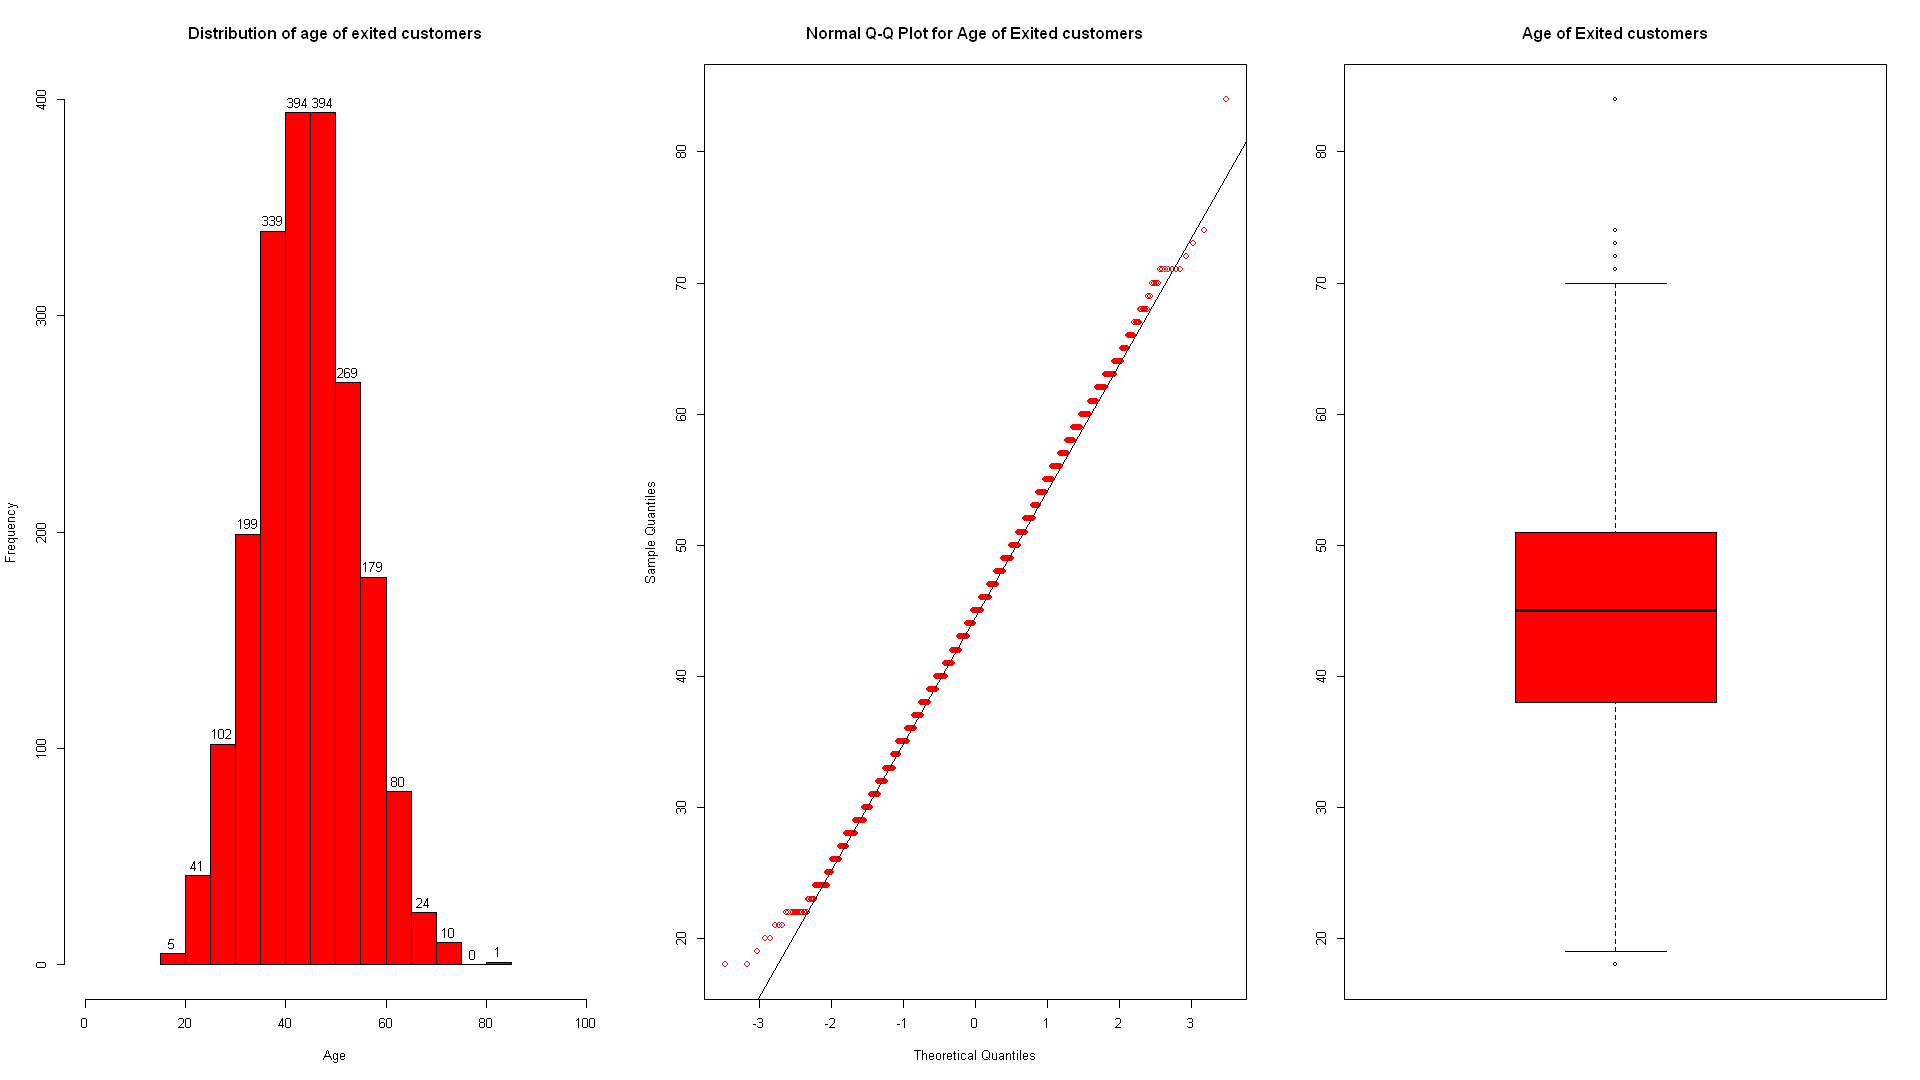

In [ ]:
options(repr.plot.width=16, repr.plot.height=9)
par(mfrow=c(1,3))

exited_age_hist <- hist(age_exited$Age,
                 ylim=c(0,400),
                 xlim = c(0,100),
                 xlab = "Age",
                 col = "red",
                 main = "Distribution of age of exited customers")
text(exited_age_hist$mids,exited_age_hist$counts,labels=exited_age_hist$counts, adj=c(0.5, -0.5))

qqnorm(age_exited$Age,
       main = "Normal Q-Q Plot for Age of Exited customers",
      col = c("red"))
qqline(age_exited$Age)

boxplot(age_exited$Age,  
        col = c("red"), 
        main = "Age of Exited customers")

In [ ]:
skew_age_exited <- skewness(age_exited$Age)
cat("The skewness value of Age of Exited customers is:", skew_age_exited,"\n")

The skewness value of Age of Exited customers is: 0.07792019 


### Inferences:

##### >The t test requires normally distributed data, which ensures the accuracy of the results. 
##### >The skewness value of Age of Exited customers is: 0.07792019
##### >The distribution of the data appears to be approximately symmetric, as indicated by the skewness value of 0.07792019.
##### >As per the histogram, the data is most likely symmetrical, which is supported by the skewness score of 0.07792019.
##### >Boxplot denotes that there are few outliers for the Age variable of exited customers, but these can not be removed as they are valid data points.
##### >The data points fall along a straight line, demonstrating an excellent fit to the normal distribution.

### Null and alternative hypothesis:

### The hypothesized mean is 39

### Two sided alternative hypothesis:

In [ ]:
two_sided_t_test <- t.test(age_exited$Age,
       mu = 39,
      alternative = 'two.sided')

two_sided_t_test


	One Sample t-test

data:  age_exited$Age
t = 26.992, df = 2036, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 39
95 percent confidence interval:
 44.41384 45.26216
sample estimates:
mean of x 
   44.838 


### Inferences:

##### >The null hypothesis states that the mean age of the entire population,which is 39, is similar to the actual average age of the consumers who have left.
##### >The alternative hypothesis is that the actual average age of the exiting consumers is not 39.
##### >The sample mean differs significantly from the null hypothesis mean of 39, as shown by the t-value of 26.992.
##### >The p-value, which is significantly lower than the significance level of 0.05 and equal to 2.2e-16, strongly rejects the null hypothesis.
##### >The actual mean age of the consumers who left falls within a 95% confidence interval of 44.41 and 45.26, exclusive of null hypothesis mean of 39.

### As a result, we can draw the conclusion that the average age of exited customers differs significantly from the population's mean age of 39.

In [ ]:
### Analyzing the distribution of "Age" variable

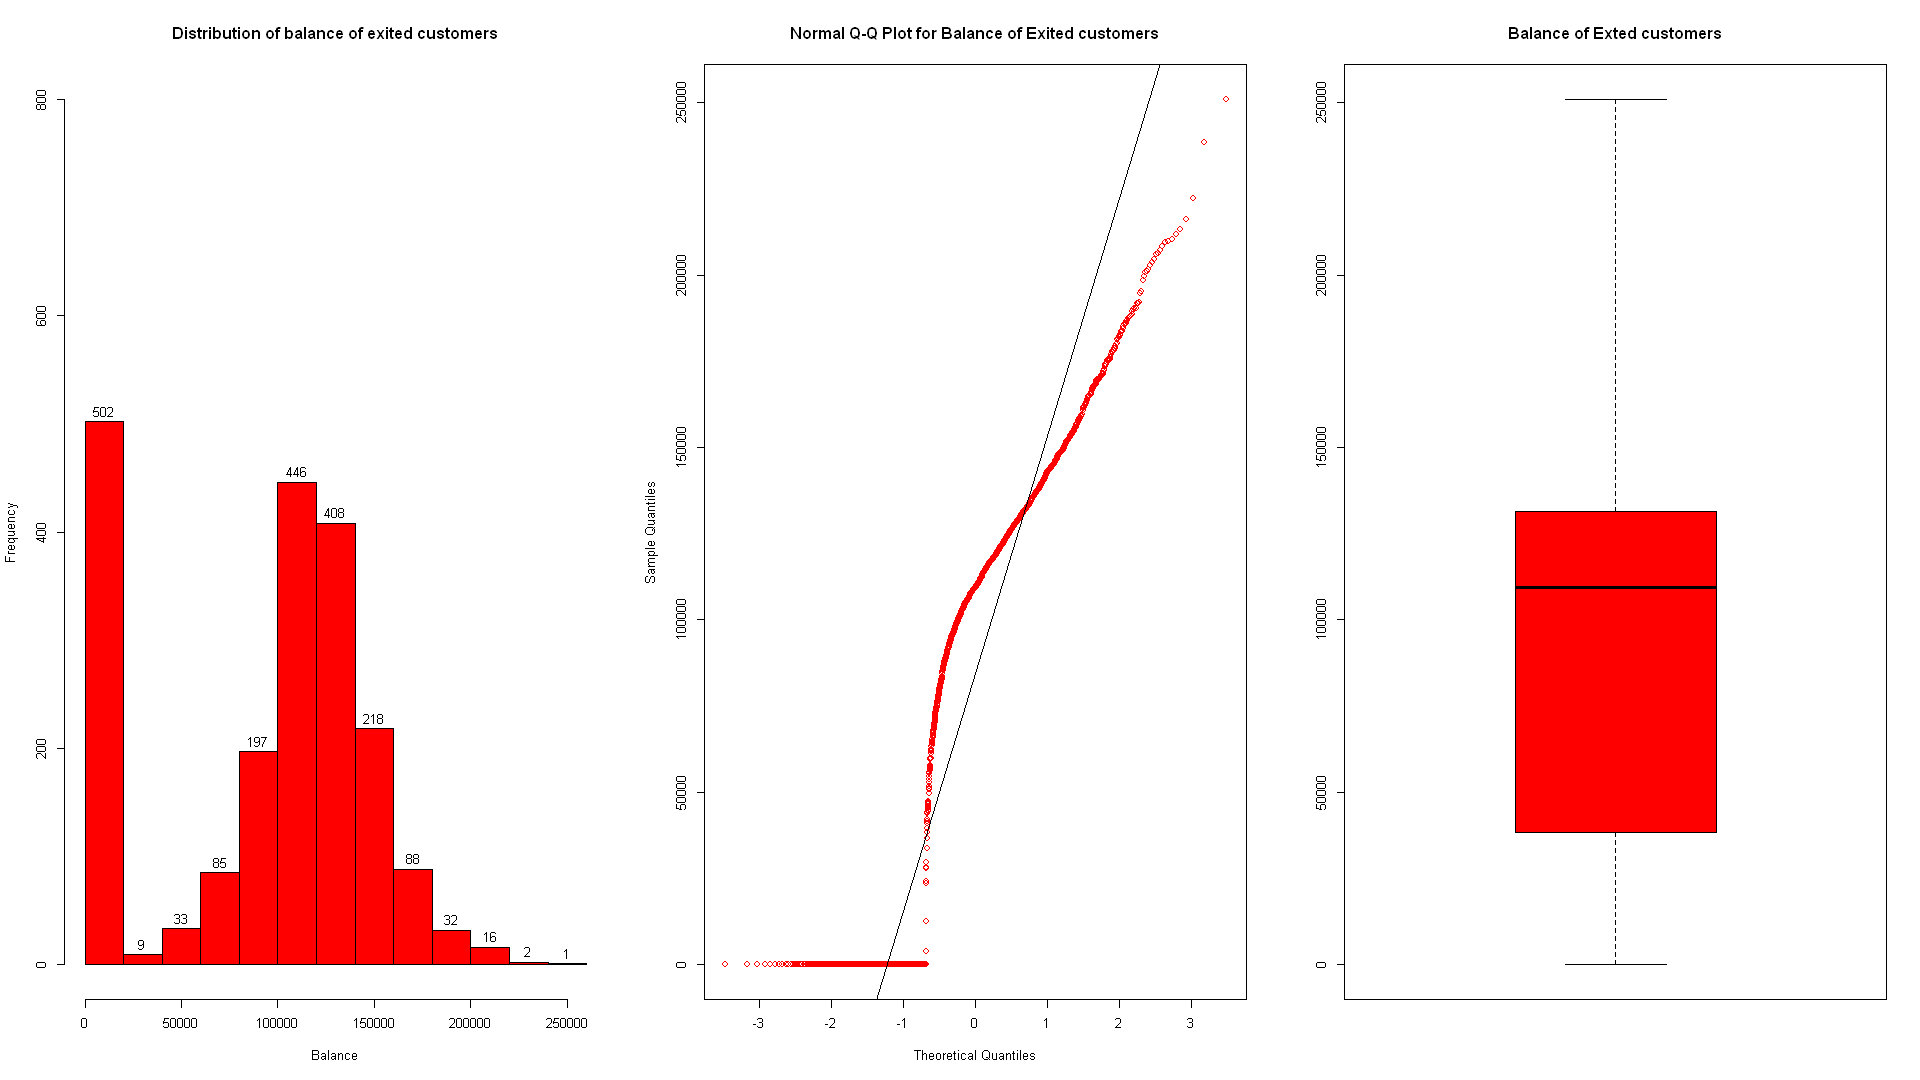

In [ ]:
options(repr.plot.width=16, repr.plot.height=9)
par(mfrow=c(1,3))

exited_balance_hist <- hist(age_exited$Balance,
                 ylim=c(0,800),
                 xlim = c(0,260000),
                 xlab = "Balance",
                 col = "red",
                 main = "Distribution of balance of exited customers")
text(exited_balance_hist$mids,exited_balance_hist$counts,labels=exited_balance_hist$counts, adj=c(0.5, -0.5))

qqnorm(age_exited$Balance,
       main = "Normal Q-Q Plot for Balance of Exited customers",
      col = c("red"))
qqline(age_exited$Balance)

boxplot(age_exited$Balance,  
        col = c("red"), 
        main = "Balance of Exted customers")

In [ ]:
skew_balance_exited <- skewness(age_exited$Balance)
cat("The skewness value of Balance of Exited customers is:", skew_balance_exited,"\n")

The skewness value of Balance of Exited customers is: -0.5123541 


In [ ]:
### Inferences:


### Null and alternative hypothesis:

### The hypothesized mean is 76486, which is the actual mean of total population

### Two sided alternative hypothesis:

In [ ]:
two_sided_t_test <- t.test(age_exited$Balance,
       mu = 76486,
      alternative = 'two.sided')

two_sided_t_test


	One Sample t-test

data:  age_exited$Balance
t = 11.308, df = 2036, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 76486
95 percent confidence interval:
 88572.64 93644.44
sample estimates:
mean of x 
 91108.54 


### Inferences:

##### >A very low p-value of  2.2e-16 from the test indicates that the average account balance of customers who left differs considerably from the population mean.
##### >With a T value of 11.308, there is significant evidence that the account balances between the population as a whole and the customers who have left significantly differ.
##### >The sample estimate of mean balance of 91,108.54 falls within the 95% confidence interval, and the 95% confidence interval of 88,572.64 to 93,644.44 indicates that it is 95% certain that the true population mean falls within this range.

### Customers who left had significantly different account balances than the general population, proving that the difference is genuine and not the result of random variation, based on the test.

In [ ]:
### Two Sample t tests:

In [ ]:
age_exited <- subset(bank_churn, Exited == 1)
age_non_exited <- subset(bank_churn, Exited == 0)

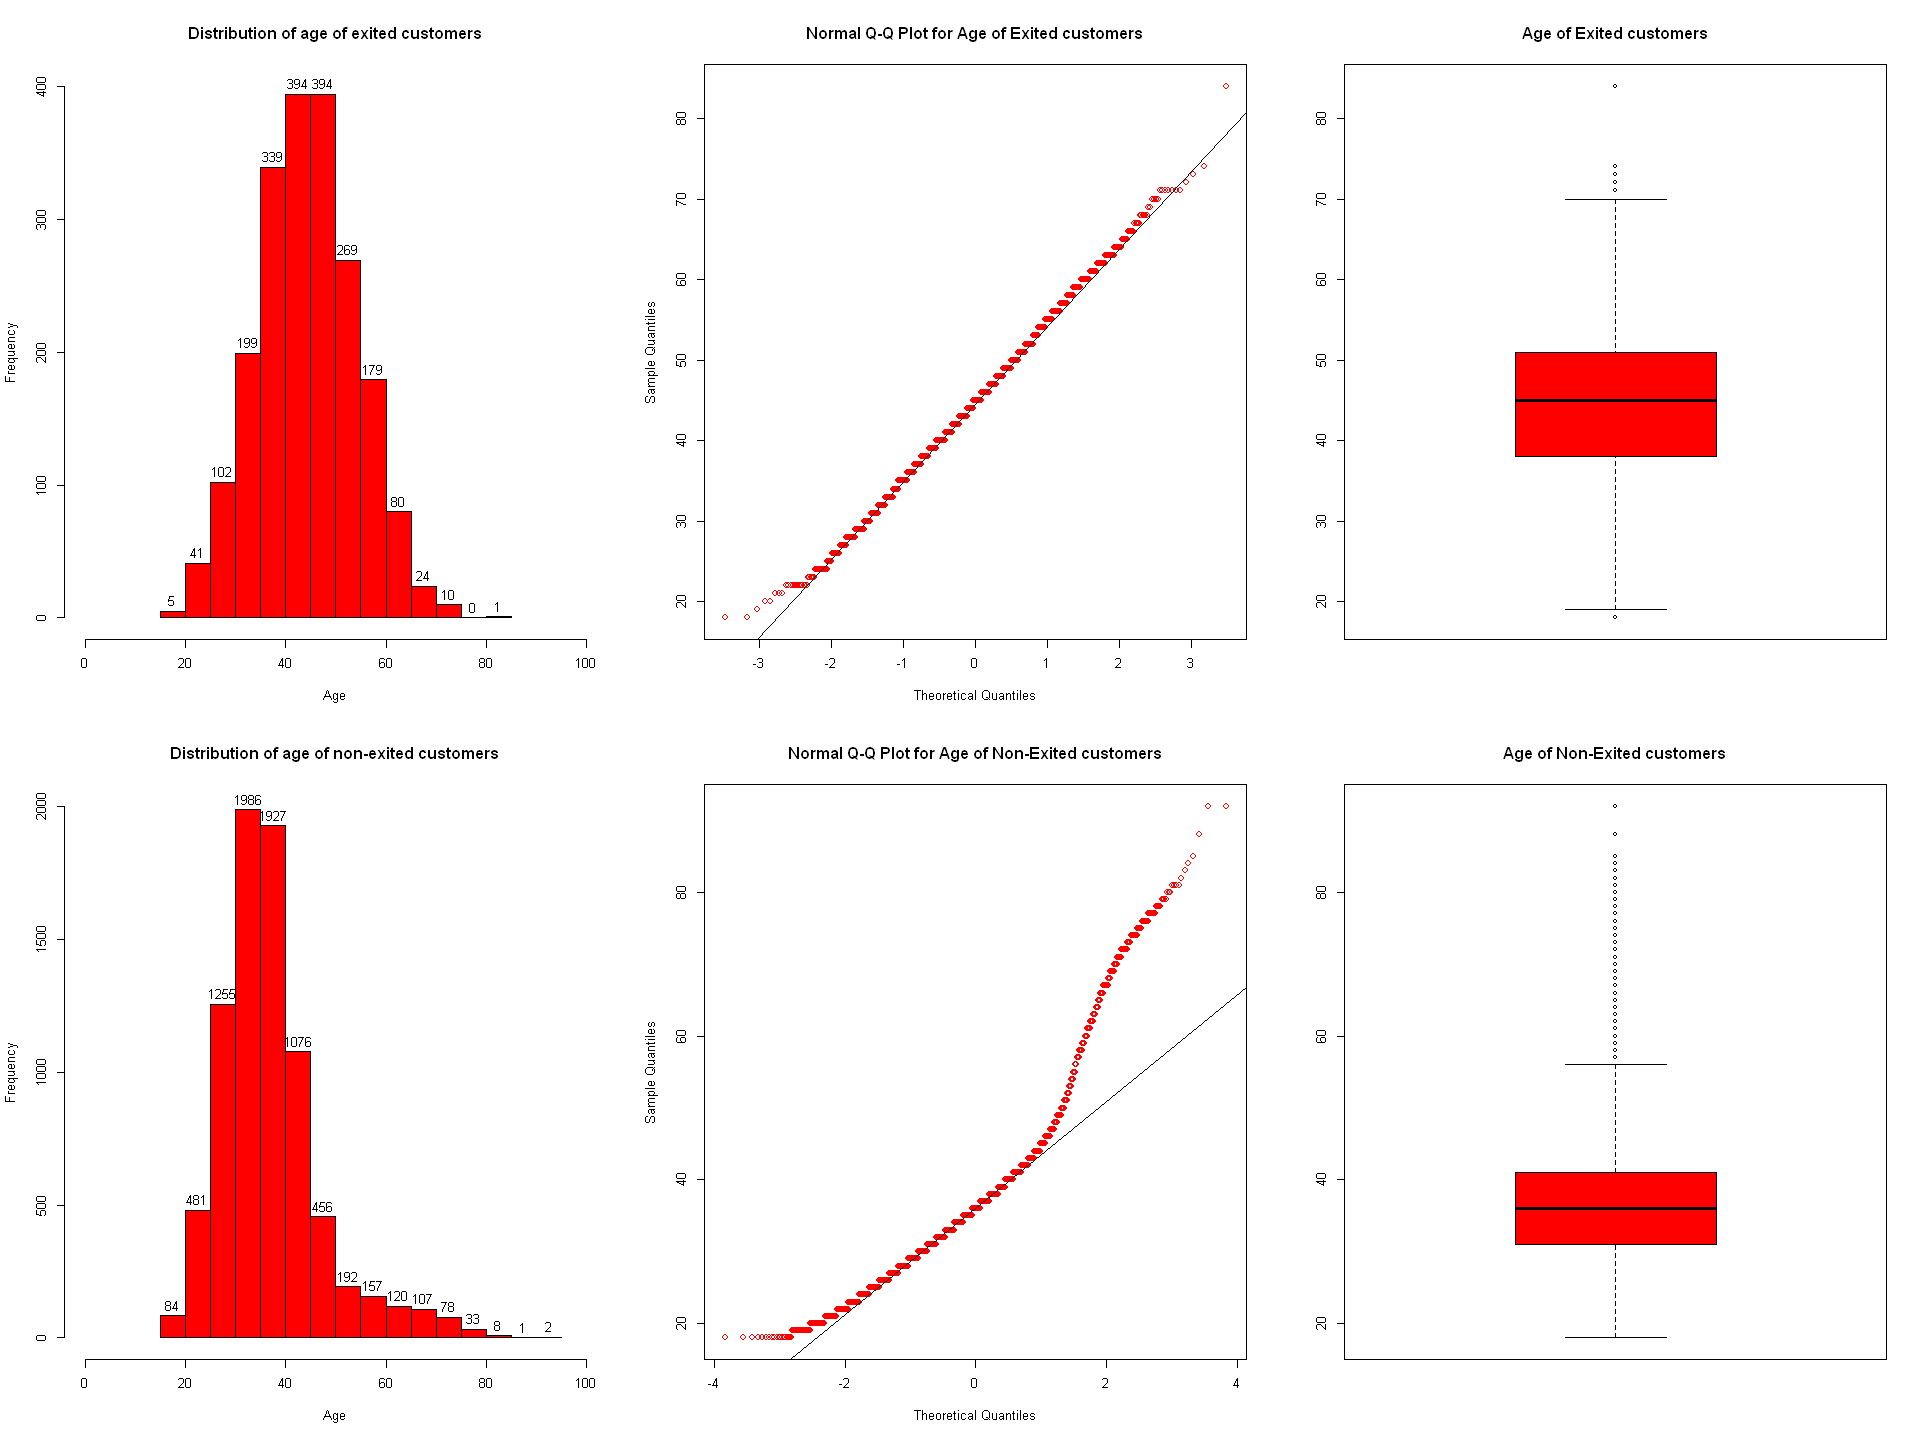

In [ ]:
options(repr.plot.width=16, repr.plot.height=12)
par(mfrow=c(2,3))

exited_age_hist <- hist(age_exited$Age,
                 ylim=c(0,400),
                 xlim = c(0,100),
                 xlab = "Age",
                 col = "red",
                 main = "Distribution of age of exited customers")
text(exited_age_hist$mids,exited_age_hist$counts,labels=exited_age_hist$counts, adj=c(0.5, -0.5))

qqnorm(age_exited$Age,
       main = "Normal Q-Q Plot for Age of Exited customers",
      col = c("red"))
qqline(age_exited$Age)

boxplot(age_exited$Age,  
        col = c("red"), 
        main = "Age of Exited customers")

non_exited_age_hist <- hist(age_non_exited$Age,
                 ylim=c(0,2000),
                 xlim = c(0,100),
                 xlab = "Age",
                 col = "red",
                 main = "Distribution of age of non-exited customers")
text(non_exited_age_hist$mids,non_exited_age_hist$counts,labels=non_exited_age_hist$counts, adj=c(0.5, -0.5))

qqnorm(age_non_exited$Age,
       main = "Normal Q-Q Plot for Age of Non-Exited customers",
      col = c("red"))
qqline(age_non_exited$Age)

boxplot(age_non_exited$Age,  
        col = c("red"), 
        main = "Age of Non-Exited customers")

In [ ]:
two_sample_t_test <- t.test(age_exited$Age, age_non_exited$Age)

print(two_sample_t_test)


	Welch Two Sample t-test

data:  age_exited$Age and age_non_exited$Age
t = 30.419, df = 3248.1, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 6.950727 7.908490
sample estimates:
mean of x mean of y 
 44.83800  37.40839 



### Inferences:

##### >The p-value is very low ( 2.2e-16), which indicates that there is strong evidence opposing the null hypothesis.

##### >The alternative hypothesis suggests that the true difference in means between the groups is not equal to zero.

##### >Compared to the non-exited group, which has a mean age of 37.40839, the exited group's sample mean age is greater at 44.83800.

##### >Moreover, the range of the 95% confidence interval for the mean difference is 6.950727 to 7.908490.

##### >From the results of the Welch Two Sample t-test, it can be concluded that there is a significant difference in mean age between customers who exited and those who did not exit the bank.

### These findings suggest that age may be a significant factor in determining program exit, with older individuals more likely to leave the bank.